(d, n) = (784, 60000)
onMeanIntensity = 0.6833624860322157
prop0 = 0.8087977040816327
prop1 = 0.006681164965986395
Label counts: [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

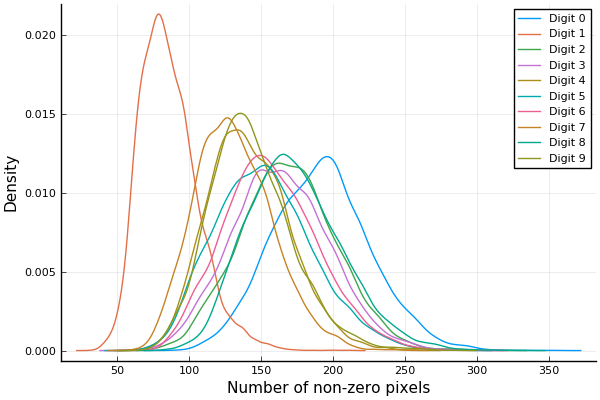

In [56]:
#Basic Exploratory Data Analysis (EDA) for MNIST with Julia
using Statistics, StatsPlots, Plots, Flux.Data.MNIST; pyplot()

imgs, labels   = MNIST.images(), MNIST.labels()
x = hcat([vcat(float.(im)...) for im in imgs]...)

d, n = size(x)
@show (d,n)

onMeanIntensity = mean(filter((u)->u>0,x))
@show onMeanIntensity

prop0 = sum(x .== 0)/(d*n)
@show prop0

prop1 = sum(x .== 1)/(d*n)
@show prop1

print("Label counts: ", [sum(labels .== k) for k in 0:9])

p = plot()
for k in 0:9
    onPixels = [ sum(x[:,i] .> 0) for i in (1:n)[labels .== k] ]
    p = density!(onPixels, label = "Digit $(k)")
end
plot(p,xlabel="Number of non-zero pixels", ylabel = "Density")

In [22]:
savefig("mnistOnPixels.png")

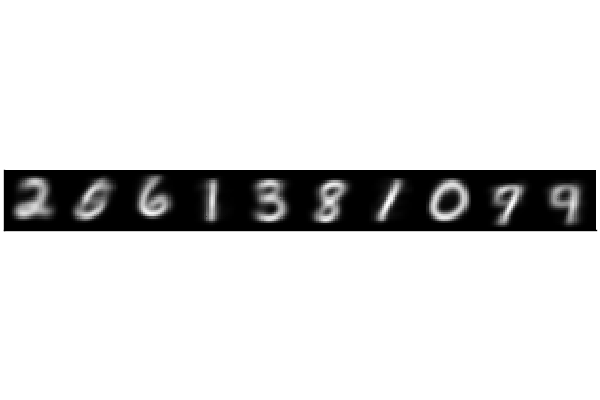

In [6]:
using Clustering, Plots, Flux.Data.MNIST, Random; pyplot()
Random.seed!(0)
imgs, labels   = MNIST.images(), MNIST.labels()
x = hcat([vcat(Float32.(im)...) for im in imgs]...)
clusterResult = kmeans(x,10)
heatmap(hcat([reshape(clusterResult.centers[:,k],28,28) for k in 1:10]...),
    yflip=true,legend=false,aspectratio = 1,ticks=false,c=cgrad([:black, :white]))

In [7]:
savefig("mnistClustering.png")

In [1]:
using Clustering, Plots, Flux.Data.MNIST, Random; pyplot()
Random.seed!(0)
imgs, labels   = MNIST.images(), MNIST.labels()
x = hcat([vcat(Float32.(im)...) for im in imgs]...)
clusterResult = kmeans(x,5)
heatmap(hcat([reshape(clusterResult.centers[:,k],28,28) for k in 1:10]...),
    yflip=true,legend=false,aspectratio = 1,ticks=false,c=cgrad([:black, :white]))

BoundsError: BoundsError: attempt to access 784×5 Array{Float32,2} at index [Base.Slice(Base.OneTo(784)), 6]

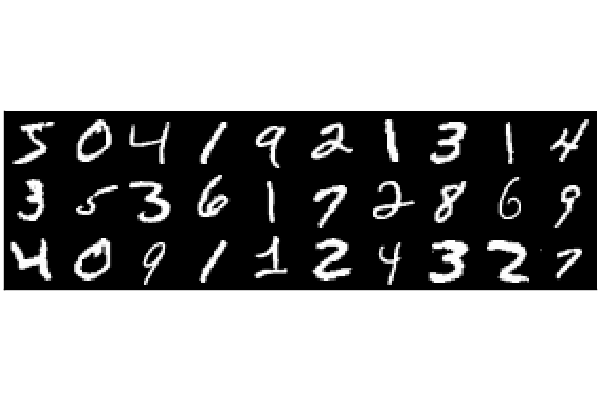

In [40]:
using Plots, Flux.Data.MNIST; pyplot()
imgs = MNIST.images()
heatmap(vcat(hcat(imgs[1:10]...),
             hcat(imgs[11:20]...),
             hcat(imgs[21:30]...)),ticks=false)

In [41]:
savefig("mnistFigs.png")

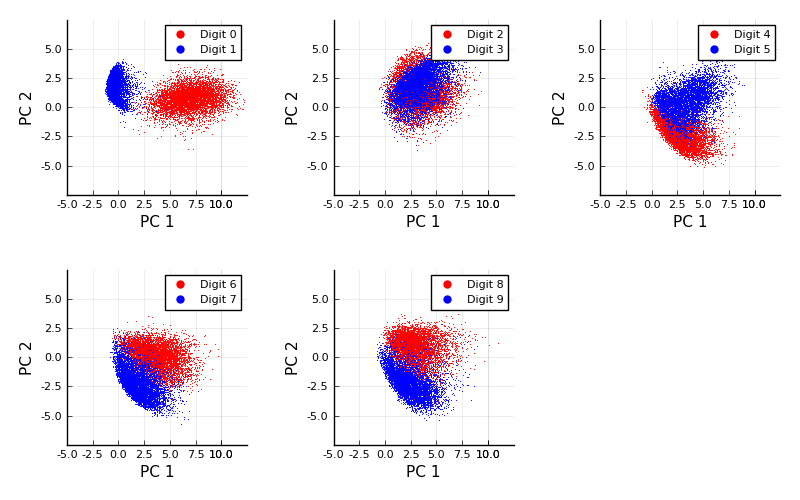

In [10]:
using MultivariateStats,LinearAlgebra,Flux.Data.MNIST,Measures,Plots
pyplot()

imgs, labels   = MNIST.images(), MNIST.labels()
x = hcat([vcat(float.(im)...) for im in imgs]...)
pca = fit(PCA, x; maxoutdim=2)
M = projection(pca)

function compareDigits(dA,dB)
    imA, imB = imgs[labels .== dA], imgs[labels .== dB]
    xA = hcat([vcat(float.(im)...) for im in imA]...)
    xB = hcat([vcat(float.(im)...) for im in imB]...)
    zA, zB = M'*xA, M'*xB
    default(ms=0.8, msw=0, xlims=(-5,12.5), ylims=(-7.5,7.5),
            legend = :topright, xlabel="PC 1", ylabel="PC 2")
    scatter(zA[1,:],zA[2,:], c=:red,  label="Digit $(dA)")
    scatter!(zB[1,:],zB[2,:], c=:blue, label="Digit $(dB)")
end

plots = []
for k in 1:5
    push!(plots,compareDigits(2k-2,2k-1))
end
plot(plots...,size = (800, 500), margin = 5mm)

In [61]:
#Julia code 
using Metalhead

#downloads about 0.5Gb of a pretrained neural network from the web
vgg = VGG19();
vgg.layers

#download an arbitrary image and try to classify it
download("https://deeplearningmath.org/data/images/appleFruit.jpg","appleFruit.jpg");
img = load("appleFruit.jpg");
classify(vgg,img)


"Granny Smith"

In [60]:
#and again
download("https://deeplearningmath.org/data/images/baby.jpg","baby.jpg");
img = load("baby.jpg");
classify(vgg,img)

"diaper, nappy, napkin"

In [3]:
using Flux, Flux.Data.MNIST, LinearAlgebra
using Flux: onehotbatch

imgs   = Flux.Data.MNIST.images()
labels = Flux.Data.MNIST.labels()
nTrain = length(imgs)
trainData = vcat([hcat(float.(imgs[i])...) for i in 1:nTrain]...)
trainLabels = labels[1:nTrain]
testImgs = Flux.Data.MNIST.images(:test)
testLabels = Flux.Data.MNIST.labels(:test)
nTest = length(testImgs)
testData = vcat([hcat(float.(testImgs[i])...) for i in 1:nTest]...)

A = [ones(nTrain) trainData]
Adag = pinv(A)
tfPM(x) = x ? +1 : -1
yDat(k) = tfPM.(onehotbatch(trainLabels,0:9)'[:,k+1])
bets = [Adag*yDat(k) for k in 0:9]

classify(input) = findmax([([1 ; input])'*bets[k] for k in 1:10])[2]-1

predictions = [classify(testData[k,:]) for k in 1:nTest]
confusionMatrix = [sum((predictions .== i) .& (testLabels .== j))
				for i in 0:9, j in 0:9]
accuracy = sum(diag(confusionMatrix))/nTest

println("Accuracy: ", accuracy, "\nConfusion Matrix:")
show(stdout, "text/plain", confusionMatrix)


Accuracy: 0.8603
Confusion Matrix:
10×10 Array{Int64,2}:
 944     0   18    4    0   23   18    5   14   15
   0  1107   54   17   22   18   10   40   46   11
   1     2  813   23    6    3    9   16   11    2
   2     2   26  880    1   72    0    6   30   17
   2     3   15    5  881   24   22   26   27   80
   7     1    0   17    5  659   17    0   40    1
  14     5   42    9   10   23  875    1   15    1
   2     1   22   21    2   14    0  884   12   77
   7    14   37   22   11   39    7    0  759    4
   1     0    5   12   44   17    0   50   20  801

In [138]:
using Flux, Flux.Data.MNIST, LinearAlgebra, Random, Distributions
using Flux: onehotbatch

imgs   = Flux.Data.MNIST.images()
labels = Flux.Data.MNIST.labels()
nTrain = length(imgs)
trainData = vcat([hcat(float.(imgs[i])...) for i in 1:nTrain]...)
trainLabels = labels[1:nTrain]
testImgs = Flux.Data.MNIST.images(:test)
testLabels = Flux.Data.MNIST.labels(:test)
nTest = length(testImgs)
testData = vcat([hcat(float.(testImgs[i])...) for i in 1:nTest]...)

Random.seed!(0)
wS = rand(784) .- 0.5
bS = 0.0
bestAcc = 0.0

α₀, α₁ = 2, 0.1

for epoch in 1:5
    @show epoch
    rn = rand(Normal(),784)
    w = wS + α₁*rn/norm(rn)
    b = bS + α₀*rand(Normal())

    trainDataPos = trainData[(trainData*w .+ b) .>= 0,:]
    trainLabelsPos = trainLabels[(trainData*w .+ b) .>= 0]
    nPos = length(trainLabelsPos)

    trainDataNeg = trainData[(trainData*w .+ b) .< 0,:]
    trainLabelsNeg = trainLabels[(trainData*w .+ b) .< 0]
    nNeg = length(trainLabelsNeg)

    @show nPos,nNeg

    Ap = [ones(nPos) trainDataPos]
    AdagPos = pinv(Ap)

    An = [ones(nNeg) trainDataNeg]
    AdagNeg = pinv(An)

    tfPM(x) = x ? +1 : -1
    yDatPos(k) = tfPM.(onehotbatch(trainLabelsPos,0:9)'[:,k+1])
    yDatNeg(k) = tfPM.(onehotbatch(trainLabelsNeg,0:9)'[:,k+1])
    betsPos = [AdagPos*yDatPos(k) for k in 0:9]
    betsNeg = [AdagNeg*yDatNeg(k) for k in 0:9]

    classify(input) = findmax([
            (input'w+b >= 0 ? 
                ([1 ; input])'*betsPos[k] 
                  :
                ([1 ; input])'*betsNeg[k])
            for k in 1:10])[2]-1

    predictions = [classify(testData[k,:]) for k in 1:nTest]
    accuracy = sum(predictions .== testLabels)/nTest
    @show accuracy 
    if accuracy > bestAcc
        bestAcc = accuracy
        wS, bs = w, b
        println("Found improvement")
    else
        println("No improvement in this step")
    end
    println()
end
println("\nFinal accuracy: ", bestAcc)

epoch = 1
(nPos, nNeg) = (36101, 23899)
accuracy = 0.868
Found improvement

epoch = 2
(nPos, nNeg) = (31267, 28733)
accuracy = 0.8687
Found improvement

epoch = 3
(nPos, nNeg) = (43458, 16542)
accuracy = 0.8616
No improvement in this step

epoch = 4
(nPos, nNeg) = (27326, 32674)
accuracy = 0.8709
Found improvement

epoch = 5
(nPos, nNeg) = (26633, 33367)
accuracy = 0.8698
No improvement in this step


Final accuracy: 0.8709


In [264]:
using MLDatasets

# load full training set
train_x, train_y = CIFAR10.traindata()

# load full test set
# test_x,  test_y  = CIFAR10.testdata();

In [265]:
frogs = train_x[:,:,:,train_y .== 6] 
ships = train_x[:,:,:,train_y .== 8];

In [287]:
using LinearAlgebra
using Flux: onehotbatch

nn = 1000
trainLabels = train_y[1:nn]

A = hcat(ones(3072), [Float32.(vec(train_x[:,:,:,i])) for i in 1:nn]...)
Adag = pinv(A)
tfPM(x) = x ? +1 : -1
yDat(k) = tfPM.(onehotbatch(trainLabels,0:9)'[:,k+1])
bets = [Adag*yDat(k) for k in 0:9]

classify(input) = findmax([([1 ; input])'*bets[k] for k in 1:10])[2]-1

# predictions = [classify(testData[k,:]) for k in 1:nTest]
# confusionMatrix = [sum((predictions .== i) .& (testLabels .== j))
# 				for i in 0:9, j in 0:9]
# accuracy = sum(diag(confusionMatrix))/nTest

# println("Accuracy: ", accuracy, "\nConfusion Matrix:")
# show(stdout, "text/plain", confusionMatrix)


┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1278
ERROR: LoadError: LoadError: UndefVarError: get_num_threads not defined
Stacktrace:
 [1] include(::Function, ::Module, ::String) at ./Base.jl:380
 [2] include at ./Base.jl:368 [inlined]
 [3] include(::String) at /Users/yoninazarathy/.julia/packages/NNlib/2Wxlq/src/NNlib.jl:1
 [4] top-level scope at /Users/yoninazarathy/.julia/packages/NNlib/2Wxlq/src/NNlib.jl:24
 [5] include(::Function, ::Module, ::String) at ./Base.jl:380
 [6] include(::Module, ::String) at ./Base.jl:368
 [7] top-level scope at none:2
 [8] eval at ./boot.jl:331 [inlined]
 [9] eval(::Expr) at ./client.jl:467
 [10] top-level scope at ./none:3
in expression starting at /Users/yoninazarathy/.julia/packages/NNlib/2Wxlq/src/gemm.jl:7
in expression starting at /Users/yoninazarathy/.julia/packages/NNlib/2Wxlq/src/NNlib.jl:24
ERROR: LoadError: LoadError: Failed to precompile NNlib [872c559c-99b0-510c-b3b7-b6c96a88d5cd] to /Users/yoninazar

LoadError: Failed to precompile Flux [587475ba-b771-5e3f-ad9e-33799f191a9c] to /Users/yoninazarathy/.julia/compiled/v1.5/Flux/QdkVy_QQT0h.ji.

In [283]:
pinv(A)

LoadError: InterruptException:

In [234]:
mean(frogs[:,:,1,:]), mean(frogs[:,:,2,:]), mean(frogs[:,:,3,:])

(0.47005706035539224, 0.43839367647058824, 0.34521907245710787)

In [235]:
mean(ships[:,:,1,:]), mean(ships[:,:,2,:]), mean(ships[:,:,3,:])

(0.4902259252450981, 0.5253946185661765, 0.5546856449142158)

In [229]:
mRfrogs = [mean(frogs[:,:,3,i]) for i in 1:5000]
sRfrogs = [std(frogs[:,:,3,i]) for i in 1:5000]
mean(mRfrogs), mean(sRfrogs)

(0.3452190724571077, 0.161637572806378)

In [231]:
mRships = [mean(ships[:,:,1,i]) for i in 1:5000]
sRships = [std(ships[:,:,1,i]) for i in 1:5000]
mean(mRships), mean(sRships)

(0.490225925245098, 0.20893358227698808)

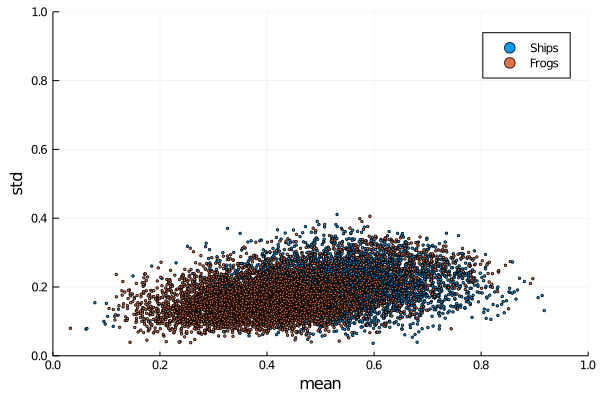

In [263]:
β = 0.4
RR, GG = 0.1, (1-β-0.1)
BB = β
greyFrogs = RR*frogs[:,:,1,:] + GG*frogs[:,:,2,:] + BB*frogs[:,:,3,:];
greyShips = RR*ships[:,:,1,:] + GG*ships[:,:,2,:] + BB*ships[:,:,3,:];
greyFrogMeans = mean.([greyFrogs[:,:,i] for i in 1:5000])
greyShipMeans = mean.([greyShips[:,:,i] for i in 1:5000]);
greyFrogStds = std.([greyFrogs[:,:,i] for i in 1:5000])
greyShipStds = std.([greyShips[:,:,i] for i in 1:5000]);
scatter(greyShipMeans,greyShipStds,ms=1.5,label="Ships",xlabel="mean",ylabel="std")
scatter!(greyFrogMeans,greyFrogStds,ms=1.5,label="Frogs",xlim=(0,1),ylim=(0,1))
# stephist(greyFrogStds,label="frogs")
# stephist!(greyShipStds,label="ships")

In [244]:
function classify(x)
    m = mean(x)
    s = std(x)
    if m^2 + s^2 < 0.5^2
        return 1 #frog
    else
        return 0 #ship
    end
end

classify (generic function with 1 method)

In [260]:
sum(classify.([greyFrogs[:,:,i] for i in 1:5000]))

3665

In [261]:
sum(classify.([greyShips[:,:,i] for i in 1:5000]))

1191

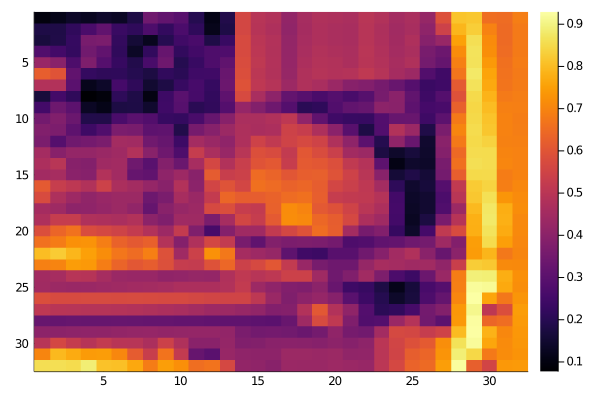

In [63]:
heatmap()

In [50]:
mean(ships[:,:,3,:])

0.5546856449142158

In [22]:
isNatural(y) = y ∈ [2,3,4,5,6,7]
isNotNatural(y) = !isNatural(y)

isNotNatural (generic function with 1 method)

In [12]:
using Statistics

In [28]:
naturalSet = train_x[:,:,:,isNatural.(train_y)];
notNaturalSet = train_x[:,:,:,isNotNatural.(train_y)];

In [27]:
mean([std(naturalSet[:,:,:,i]) for i in 1:10000])

0.20059012518502503

In [29]:
mean([std(notNaturalSet[:,:,:,i]) for i in 1:10000])

0.22749501946546524

In [67]:
using Statistics
splitData = [train_x[:,:,:,train_y .==k] for k in 0:9];
splitDataR = (x->x[:,:,1,:]).(splitData);
splitDataG = (x->x[:,:,2,:]).(splitData);
splitDataB = (x->x[:,:,3,:]).(splitData);

In [100]:
size(train_x)

(32, 32, 3, 50000)

In [107]:
vecX = [vec(float64.(train_x[:,:,:,i])) for i in 1:50000];

In [ ]:
using LinearAlgebra

A = [ones(32*32*3) hcat(vecX...)]
Adag = pinv(A)


In [ ]:
tfPM(x) = x ? +1 : -1
yDat(k) = tfPM.(onehotbatch(trainLabels,0:9)'[:,k+1])
bets = [Adag*yDat(k) for k in 0:9]

classify(input) = findmax([([1 ; input])'*bets[k] for k in 1:10])[2]-1

predictions = [classify(testData[k,:]) for k in 1:nTest]
confusionMatrix = [sum((predictions .== i) .& (testLabels .== j))
				for i in 0:9, j in 0:9]
accuracy = sum(diag(confusionMatrix))/nTest

println("Accuracy: ", accuracy, "\nConfusion Matrix:")
show(stdout, "text/plain", confusionMatrix)


In [79]:
mean.(splitDataR)

10-element Array{Float32,1}:
 0.5256554
 0.47118407
 0.4892499
 0.49548241
 0.47159064
 0.49992588
 0.47005704
 0.5019583
 0.49022594
 0.498667

In [83]:
std.(splitDataR)

10-element Array{Float32,1}:
 0.25022024
 0.26806358
 0.2270548
 0.25684315
 0.21732739
 0.25042534
 0.22888342
 0.243049
 0.24962471
 0.26805255

In [80]:
mean.(splitDataG)

10-element Array{Float32,1}:
 0.5603293
 0.4545294
 0.49147704
 0.4564121
 0.46520567
 0.4646367
 0.43839365
 0.47986388
 0.52539456
 0.4853415

In [82]:
mean.(splitDataB)

10-element Array{Float32,1}:
 0.58890676
 0.44719863
 0.42404473
 0.4155386
 0.37820712
 0.41654605
 0.34521905
 0.41688597
 0.5546856
 0.4780763

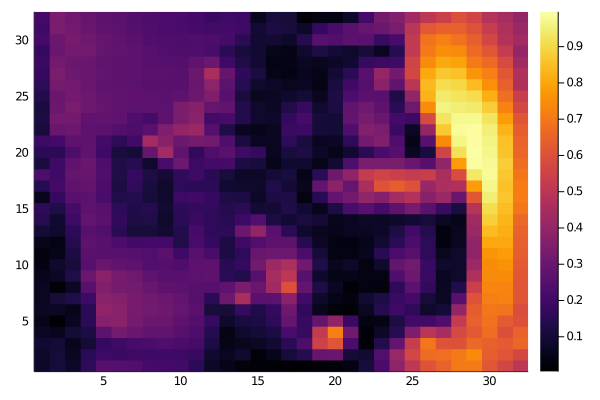

In [78]:
heatmap(splitDataB[2][:,:,5])

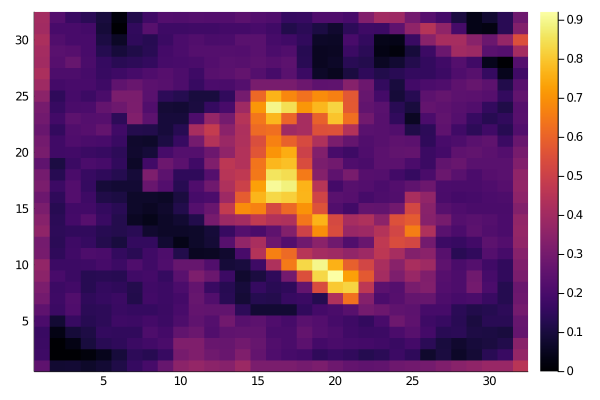

In [8]:
using Plots
heatmap(train_x[:,:,3,1])

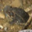

In [21]:
using ImageCore
using MLDatasets: CIFAR10.convert2image
img = convert2image(train_x[:,:,:,24])

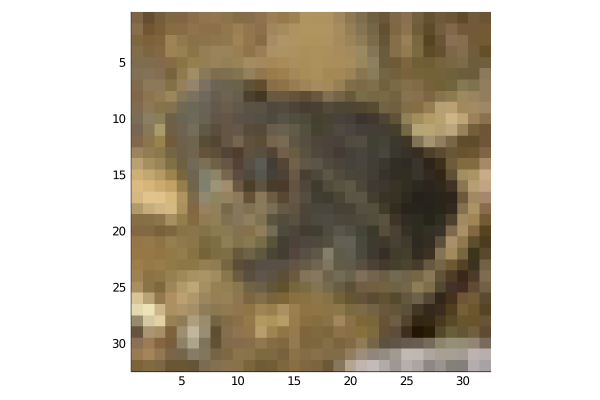

In [22]:
heatmap(img)

In [24]:
train_y[24]

6

In [26]:
using MLDatasets: CIFAR10.classnames
classnames()

10-element Array{String,1}:
 "airplane"
 "automobile"
 "bird"
 "cat"
 "deer"
 "dog"
 "frog"
 "horse"
 "ship"
 "truck"

In [32]:
frogs = train_x[:,:,:,train_y .== 6];
size(frogs)

(32, 32, 3, 5000)

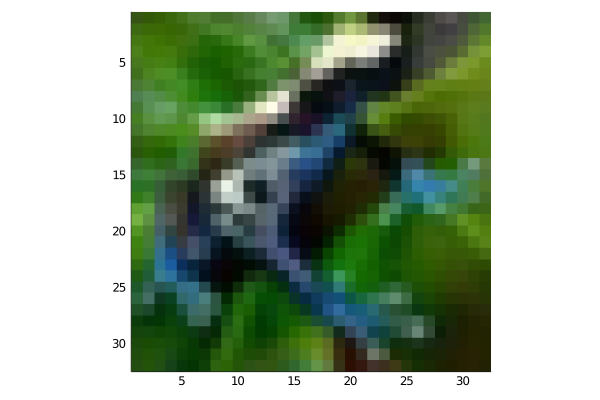

In [40]:
heatmap(convert2image(frogs[:,:,:,100]))